# Mock Dataset

In [74]:
"""
age 
sex 
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. 
It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

PREDICTION:
The "target" field refers to the presence of heart disease in the patient. 
It is integer valued 0 = no disease and 1 = disease.
"""

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

keep = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
rename = ["age", "sex", "chest_pain", "blood_pressure", "cholesterol", "blood_sugar", 
"resting_electro", "max_heartrate", "angina", "st_oldpeak", "st_slope", "major_vessels", "cardiopathy_type"]
len(keep), len(rename)

(13, 13)

In [78]:
df = pd.read_csv("./resources/heart.csv", delimiter=',')
df = df.rename(columns={k: v for k, v in zip(keep, rename)})
df.head(20)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,resting_electro,max_heartrate,angina,st_oldpeak,st_slope,major_vessels,cardiopathy_type,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [79]:
df.columns, df.shape

(Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
        'blood_sugar', 'resting_electro', 'max_heartrate', 'angina',
        'st_oldpeak', 'st_slope', 'major_vessels', 'cardiopathy_type',
        'target'],
       dtype='object'),
 (1025, 14))

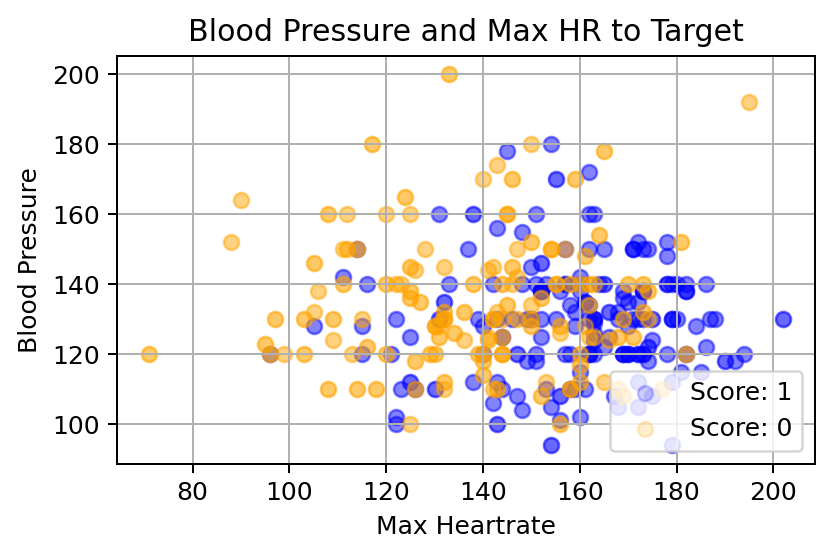

In [90]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=180, facecolor="white")
target = df["target"].value_counts().index

for t, color in zip(target.values, ("blue", "orange")):
    data: pd.DataFrame = df[df["target"] == t]
    ax.scatter(
        data["max_heartrate"],
        data["blood_pressure"], 
        c=color,
        label=f"Score: {t}",
        alpha=0.2,
    )
ax.legend(loc="lower right")
ax.grid(True)
plt.title("Blood Pressure and Max HR to Target")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Max Heartrate")
fig.savefig(
    "./resources/Max_heartrate_and_Blood_pressure_to_target.png",
    transparent=False
)

In [81]:
# Save dataframe!
df.to_csv("./resources/clean_heart.csv", index=False)